In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
# cd /content/drive/MyDrive/SML

In [38]:
# NVIDIA CUDA
import torch
if torch.cuda.is_available():
    print("CUDA is available.")

    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

    print(f"Current GPU device: {torch.cuda.current_device()}")
else:
    print("CUDA is not available. Running on CPU.")

CUDA is available.
Number of available GPUs: 1
GPU 0: NVIDIA GeForce RTX 4070 SUPER
Current GPU device: 0


In [39]:
# here for libs
import pandas as pd

In [40]:
# Load individual datasets
olist_customers_df = pd.read_csv('./data/olist_customers_dataset.csv')
order_items_df = pd.read_csv('./data/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')
olist_orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
sellers_df = pd.read_csv('./data/olist_sellers_dataset.csv')
products_df = pd.read_csv('./data/olist_products_dataset.csv')
product_category_name_translation_df = pd.read_csv('./data/product_category_name_translation.csv')

In [41]:
olist_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [42]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [43]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [44]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [45]:
olist_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [46]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [47]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [48]:
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Merge dataset

In [49]:
merged_1 = pd.merge(olist_orders_df, olist_customers_df, on='customer_id', how='left')

In [50]:
merged_2 = pd.merge(sellers_df, order_items_df, on='seller_id', how='left')

In [51]:
merged_3 = pd.merge(products_df, product_category_name_translation_df, on = 'product_category_name', how = 'left')

In [52]:
merged_4 = pd.merge(merged_2, merged_3, on='product_id', how='left')

In [53]:
merged_5 = pd.merge(merged_1, merged_4, on='order_id', how='left')

In [54]:
merged_6 = pd.merge(merged_5, order_payments_df, on='order_id', how='left')

In [55]:
merged = pd.merge(merged_6, order_reviews_df, on='order_id', how='left')

In [56]:
merged.to_csv('./data/merged_data.csv', index=False)

In [57]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  seller_id                     

In [58]:
merged.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
seller_id                           833
seller_zip_code_prefix              833
seller_city                         833
seller_state                        833
order_item_id                       833
product_id                          833
shipping_limit_date                 833
price                               833
freight_value                       833
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542


In [59]:
merged = merged.drop(columns=['review_comment_title', 'review_comment_message'], axis=1)
merged = merged.dropna()
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 119142
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113193 non-null  object 
 1   customer_id                    113193 non-null  object 
 2   order_status                   113193 non-null  object 
 3   order_purchase_timestamp       113193 non-null  object 
 4   order_approved_at              113193 non-null  object 
 5   order_delivered_carrier_date   113193 non-null  object 
 6   order_delivered_customer_date  113193 non-null  object 
 7   order_estimated_delivery_date  113193 non-null  object 
 8   customer_unique_id             113193 non-null  object 
 9   customer_zip_code_prefix       113193 non-null  int64  
 10  customer_city                  113193 non-null  object 
 11  customer_state                 113193 non-null  object 
 12  seller_id                      1131

#### Data cleaning

In [60]:
datetime = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date',
                    'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

for col in datetime:
    merged[col] = pd.to_datetime(merged[col])

# Extract components of dates
merged['purchase_day'] = merged['order_purchase_timestamp'].dt.weekday # Monday=0, Sunday=6
merged['purchase_month'] = merged['order_purchase_timestamp'].dt.month

# The total time from the purchase of the order to the actual delivery to the customer
merged['total_delivery_time'] = (merged['order_delivered_customer_date'] - merged['order_purchase_timestamp']).dt.days
# Time from order creation to payment approval
merged['approval_time'] = (merged['order_approved_at'] - merged['order_purchase_timestamp']).dt.days
# Time from logistics to customer delivery
merged['shipping_time'] = (merged['order_delivered_customer_date'] - merged['order_delivered_carrier_date']).dt.days
# Deviation between actual delivery time and estimated delivery time
merged['delivery_estimate_deviation'] = (merged['order_estimated_delivery_date'] - merged['order_delivered_customer_date']).dt.days
# Late delivery
merged['late_delivery'] = (merged['order_delivered_customer_date'] > merged['order_estimated_delivery_date']).astype(int)

# Total order value(product + freight)
merged['total_order_value'] = merged['price'] + merged['freight_value']


In [68]:
merged.head()

,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_type,payment_installments,payment_value,review_score,purchase_day,purchase_month,total_delivery_time,approval_time,shipping_time,delivery_estimate_deviation,late_delivery,total_order_value
0,29.99,8.72,2,500.0,19.0,8.0,13.0,2,0,1.0,18.12,4.0,0,10,8,0,6,7,0,38.71
1,29.99,8.72,2,500.0,19.0,8.0,13.0,2,2,1.0,2.00,4.0,0,10,8,0,6,7,0,38.71
2,29.99,8.72,2,500.0,19.0,8.0,13.0,2,2,1.0,18.59,4.0,0,10,8,0,6,7,0,38.71
3,118.70,22.76,2,400.0,19.0,13.0,19.0,2,1,1.0,141.46,4.0,1,7,13,1,12,5,0,141.46
4,159.90,19.22,2,420.0,24.0,19.0,21.0,2,0,3.0,179.12,5.0,2,8,9,0,9,17,0,179.12


In [62]:
# Labeling
category_to_label = {
    'cama_mesa_banho': 0,
    'esporte_lazer': 1,
    'other': 2
}
merged['product_category_name'] = merged['product_category_name'].apply(lambda x: x if x in category_to_label else 'other')
merged['product_category_name'] = merged['product_category_name'].map(category_to_label)


name_to_label = {
    'bed_bath_table': 0,
    'sports_leisure': 1,
    'other': 2
}
merged['product_category_name_english'] = merged['product_category_name_english'].apply(lambda x: x if x in name_to_label else 'other')
merged['product_category_name_english'] = merged['product_category_name_english'].map(name_to_label)



In [63]:
category_to_label = {
    'credit_card': 0,
    'boleto': 1,
    'other': 2
}
merged['payment_type'] = merged['payment_type'].apply(lambda x: x if x in category_to_label else 'other')
merged['payment_type'] = merged['payment_type'].map(category_to_label)


In [64]:
merged['review_score'].value_counts()

review_score
5.0    65145
4.0    21811
1.0    12865
3.0     9533
2.0     3839
Name: count, dtype: int64

0         4.0
1         4.0
2         4.0
3         4.0
4         5.0
         ... 
119138    4.0
119139    5.0
119140    2.0
119141    2.0
119142    5.0
Name: review_score, Length: 113193, dtype: float64

In [65]:
# Remove unnecessary features
merged = merged.select_dtypes(include=['int', 'float'])
merged.drop(['customer_zip_code_prefix', 'seller_zip_code_prefix', 'order_item_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'payment_sequential']
               , axis=1, inplace=True)
# save the cleaned dataset
merged.to_csv('./data/merged_data_cleaned.csv', index=False)

In [66]:
merged.head()

,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_type,payment_installments,payment_value,review_score,purchase_day,purchase_month,total_delivery_time,approval_time,shipping_time,delivery_estimate_deviation,late_delivery,total_order_value
0,29.99,8.72,2,500.0,19.0,8.0,13.0,2,0,1.0,18.12,4.0,0,10,8,0,6,7,0,38.71
1,29.99,8.72,2,500.0,19.0,8.0,13.0,2,2,1.0,2.00,4.0,0,10,8,0,6,7,0,38.71
2,29.99,8.72,2,500.0,19.0,8.0,13.0,2,2,1.0,18.59,4.0,0,10,8,0,6,7,0,38.71
3,118.70,22.76,2,400.0,19.0,13.0,19.0,2,1,1.0,141.46,4.0,1,7,13,1,12,5,0,141.46
4,159.90,19.22,2,420.0,24.0,19.0,21.0,2,0,3.0,179.12,5.0,2,8,9,0,9,17,0,179.12


In [87]:
data=merged
X = data.drop('review_score', axis=1)
y = data['review_score']


## 2.Validation methods

### 2.1 cross validation

In [71]:
import numpy as np

def manual_train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state) 
    indices = np.random.permutation(len(X))  
    test_set_size = int(len(X) * test_size)  
    test_indices = indices[:test_set_size]  
    train_indices = indices[test_set_size:]  
    

    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test



### 2.2 k fold validation

In [72]:
import numpy as np

def manual_kfold(X, y, k=5, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    fold_size = len(X) // k
    folds = []

    for i in range(k):
        test_indices = indices[i*fold_size:(i+1)*fold_size]
        train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])
        folds.append((train_indices, test_indices))
    
    return folds


k_folds = manual_kfold(X, y, k=5, random_state=42)


for i, (train_idx, test_idx) in enumerate(k_folds):
    print(f"Fold {i+1}: Train size = {len(train_idx)}, Test size = {len(test_idx)}")


Fold 1: Train size = 90555, Test size = 22638
Fold 2: Train size = 90555, Test size = 22638
Fold 3: Train size = 90555, Test size = 22638
Fold 4: Train size = 90555, Test size = 22638
Fold 5: Train size = 90555, Test size = 22638


## 3.ML algorithms and Experimental results

### 3.1 Simple algorithms: Random Forest

Experiment with Train Size 905: Accuracy = 0.583
Experiment with Train Size 905: Accuracy = 0.592
Experiment with Train Size 905: Accuracy = 0.581
Experiment with Train Size 905: Accuracy = 0.582
Experiment with Train Size 905: Accuracy = 0.587
Experiment with Train Size 9055: Accuracy = 0.606
Experiment with Train Size 9055: Accuracy = 0.615
Experiment with Train Size 9055: Accuracy = 0.613
Experiment with Train Size 9055: Accuracy = 0.612
Experiment with Train Size 9055: Accuracy = 0.612
Experiment with Train Size 28636: Accuracy = 0.631
Experiment with Train Size 28636: Accuracy = 0.642
Experiment with Train Size 28636: Accuracy = 0.639
Experiment with Train Size 28636: Accuracy = 0.637
Experiment with Train Size 28636: Accuracy = 0.636
Experiment with Train Size 90555: Accuracy = 0.679
Experiment with Train Size 90555: Accuracy = 0.690
Experiment with Train Size 90555: Accuracy = 0.687
Experiment with Train Size 90555: Accuracy = 0.683
Experiment with Train Size 90555: Accuracy = 0

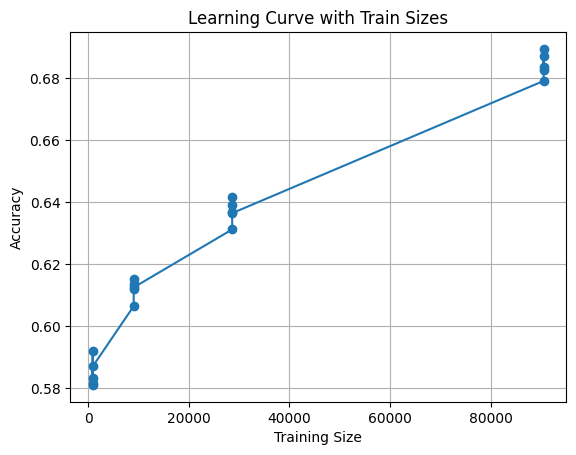

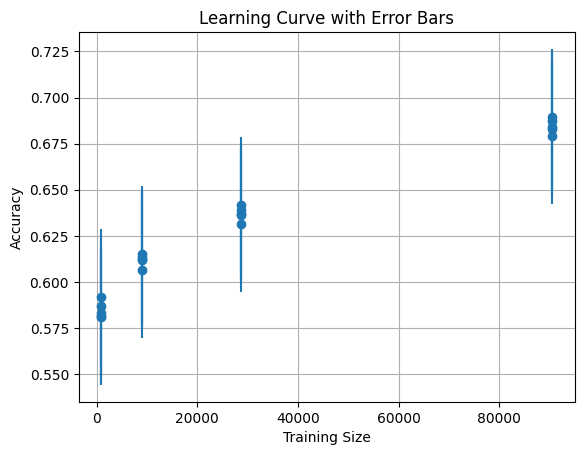

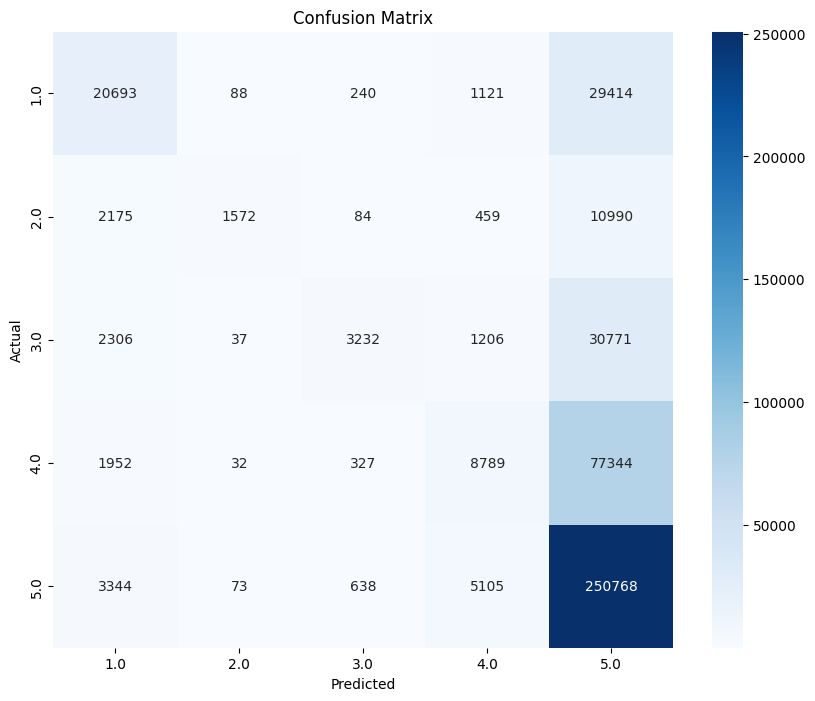

              precision    recall  f1-score   support

         1.0       0.68      0.40      0.50     51556
         2.0       0.87      0.10      0.18     15280
         3.0       0.71      0.09      0.15     37552
         4.0       0.53      0.10      0.17     88444
         5.0       0.63      0.96      0.76    259928

    accuracy                           0.63    452760
   macro avg       0.68      0.33      0.35    452760
weighted avg       0.63      0.63      0.55    452760



In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


train_sizes = np.concatenate(([0.01], np.logspace(-1, 0, 3)))  # [0.01, 0.1, 0.5, 1.0]
n_repeats = 20  
accuracies = []
train_sizes_actual = []
all_y_test = []
all_y_pred = []


experiments_per_size = n_repeats // len(train_sizes)


for size in train_sizes:
    for i in range(experiments_per_size):
        X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_state=i)
        
       
        subset_train_idx = X_train.index[:int(len(X_train) * size)]
        X_train_subset = X_train.loc[subset_train_idx]
        y_train_subset = y_train.loc[subset_train_idx]
        
        
        model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=None)
        model.fit(X_train_subset, y_train_subset)
        
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        train_sizes_actual.append(len(X_train_subset))
        
        
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)
        
        print(f"Experiment with Train Size {len(X_train_subset)}: Accuracy = {accuracy:.3f}")


mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

# learning curve
plt.figure()
plt.plot(train_sizes_actual, accuracies, marker='o', label='Accuracy')
plt.title("Learning Curve with Train Sizes")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Error bar
plt.figure()
plt.errorbar(x=train_sizes_actual, y=accuracies, yerr=std_accuracy, fmt='o', label='Accuracy with error bar')
plt.title("Learning Curve with Error Bars")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

#conf matrix
conf_matrix = confusion_matrix(all_y_test, all_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print(classification_report(all_y_test, all_y_pred))


In [74]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def nested_cross_validation(X, y, param_grid, k_outer=5, k_inner=3):
    outer_folds = manual_kfold(X, y, k=k_outer, random_state=42)
    outer_scores = []
    
    for fold_idx, (train_idx, test_idx) in enumerate(outer_folds):
        X_train_outer, X_test_outer = X.iloc[train_idx], X.iloc[test_idx]
        y_train_outer, y_test_outer = y.iloc[train_idx], y.iloc[test_idx]
        
        best_params = None
        best_score = -np.inf
        
        inner_folds = manual_kfold(X_train_outer, y_train_outer, k=k_inner, random_state=42)
        
        for params in param_grid:
            inner_scores = []
            
            for inner_train_idx, inner_val_idx in inner_folds:
                X_train_inner, X_val_inner = X_train_outer.iloc[inner_train_idx], X_train_outer.iloc[inner_val_idx]
                y_train_inner, y_val_inner = y_train_outer.iloc[inner_train_idx], y_train_outer.iloc[inner_val_idx]
                
                model = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], random_state=42)
                model.fit(X_train_inner, y_train_inner)
                
                y_val_pred = model.predict(X_val_inner)
                inner_scores.append(accuracy_score(y_val_inner, y_val_pred))
            
            mean_inner_score = np.mean(inner_scores)
            
            if mean_inner_score > best_score:
                best_score = mean_inner_score
                best_params = params
        
        best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
        best_model.fit(X_train_outer, y_train_outer)
        y_test_pred = best_model.predict(X_test_outer)
        
        test_accuracy = accuracy_score(y_test_outer, y_test_pred)
        outer_scores.append(test_accuracy)
        
        print(f"Fold {fold_idx+1}: Best Params = {best_params}, Test Accuracy = {test_accuracy:.3f}")
    
    mean_score = np.mean(outer_scores)
    std_score = np.std(outer_scores)
    print(f"Nested CV Mean Accuracy: {mean_score:.3f}, Std: {std_score:.3f}")

# Sample 10% of the dataset
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42)

param_grid = [
    {'n_estimators': 50, 'max_depth': 10},
    {'n_estimators': 100, 'max_depth': 20},
    {'n_estimators': 200, 'max_depth': None}
]

nested_cross_validation(X_sample, y_sample, param_grid)


Fold 1: Best Params = {'n_estimators': 100, 'max_depth': 20}, Test Accuracy = 0.629
Fold 2: Best Params = {'n_estimators': 100, 'max_depth': 20}, Test Accuracy = 0.617
Fold 3: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.608
Fold 4: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.613
Fold 5: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.636
Nested CV Mean Accuracy: 0.621, Std: 0.010


### 3.2 Medium algorithms: MLP

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import numpy as np

In [90]:
def train_perceptron_pytorch(X_train_scaled, X_test_scaled, y_train, y_test, n_epochs=30, eta=0.01, optimizer='Adam', params=None):
    # Detect if CUDA is available and set the device accordingly
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Convert Pandas DataFrames to NumPy arrays
    X_train_scaled, X_test_scaled, y_train, y_test = X_train_scaled.to_numpy(), X_test_scaled.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
    # Convert to PyTorch tensors and move them to the appropriate device
    X_train_scaled, X_test_scaled, y_train, y_test = torch.from_numpy(X_train_scaled).to(device), torch.from_numpy(X_test_scaled).to(device), torch.from_numpy(y_train).to(device), torch.from_numpy(y_test).to(device)

    # Check number of classes
    n_classes = len(torch.unique(y_train))

    # Create iterable dataset in Torch format
    train_ds = torch.utils.data.TensorDataset(X_train_scaled, y_train)
    train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32)
    test_ds = torch.utils.data.TensorDataset(X_test_scaled, y_test)
    test_loader = torch.utils.data.DataLoader(test_ds, batch_size=32)

    # Create the multi-layer perceptron model and move it to the device
    model = nn.Sequential(
            nn.Linear(19, 128, dtype=torch.float64),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Linear(128, 64, dtype=torch.float64),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Linear(64, 32, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(32, 16, dtype=torch.float64),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Linear(16, n_classes, dtype=torch.float64),
            ).to(device)  # Move model to device

    # Define the loss function
    criterion = nn.CrossEntropyLoss()

    # Use the provided or default parameters
    if params:
        n_epochs = params.get('n_epochs', n_epochs)
        eta = params.get('eta', eta)
        optimizer = params.get('optimizer', optimizer)

    # Setup the optimizer. This implements the basic gradient descent update
    if optimizer == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=eta)
    elif optimizer == 'Momentum':
        optimizer = torch.optim.SGD(model.parameters(), lr=eta, momentum=0.9)
    elif optimizer == 'Adagrad':
        optimizer = torch.optim.Adagrad(model.parameters(), lr=eta, eps=1e-10)
    elif optimizer == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=eta)
    else:
        raise ValueError('Invalid optimizer')

    for epoch in range(n_epochs):
        for i, (xi, yi) in enumerate(train_loader):
            # Compute loss F(w)
            xi, yi = xi.to(device), yi.to(device).long()  # Move data to the device
            logits = model(xi)
            loss = criterion(logits, yi)

            predictions = torch.argmax(logits, dim=1)
            train_acc = torch.mean(torch.eq(predictions, yi).float()).item()

            loss.backward()               # Backward pass (compute parameter gradients)
            optimizer.step()              # Update weight parameter using SGD
            optimizer.zero_grad()         # Reset gradients to zero for next iteration

    # Evaluate the model, not necessary for training
    with torch.no_grad():
        for xi, yi in test_loader:
            xi, yi = xi.to(device), yi.to(device).long()  # Move data to the device
            logits = model(xi)
            loss = criterion(logits, yi)
            predictions = torch.argmax(logits, dim=1)
            accuracy = torch.mean(torch.eq(predictions, yi).float()).item()

    return accuracy


In [91]:

X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


params = {
    'n_epochs': 20,
    'eta': 0.01,
    'optimizer': 'Adam'
}


accuracy = train_perceptron_pytorch(X_train_scaled, X_test_scaled, y_train, y_test, n_epochs=params['n_epochs'], eta=params['eta'], optimizer=params['optimizer'])


print(f"Test Accuracy: {accuracy:.4f}")


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [80]:
def nested_cross_validation(X, y, param_grid, outer_k=5, inner_k=3, n_epochs=30, eta=0.01, optimizer='Adam'):
    outer_kf = manual_kfold(X, y, k=outer_k, random_state=42)
    outer_scores = []

    for outer_fold, (train_index, test_index) in enumerate(outer_kf):
        #print(f"Outer Fold {outer_fold + 1}")
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        best_params = None
        best_score = -np.inf

        inner_kf = manual_kfold(X_train, y_train, k=inner_k, random_state=42)

        for params in param_grid:
            inner_scores = []
            for inner_fold, (inner_train_index, inner_val_index) in enumerate(inner_kf):
                X_train_inner, X_val_inner = X_train.iloc[inner_train_index], X_train.iloc[inner_val_index]
                y_train_inner, y_val_inner = y_train.iloc[inner_train_index], y_train.iloc[inner_val_index]

                # Scaling
                scaler = StandardScaler()
                X_train_inner_scaled = scaler.fit_transform(X_train_inner)
                X_val_inner_scaled = scaler.transform(X_val_inner)

                # Convert to Pandas DataFrame
                X_train_inner_scaled = pd.DataFrame(X_train_inner_scaled, columns=X_train_inner.columns)
                X_val_inner_scaled = pd.DataFrame(X_val_inner_scaled, columns=X_val_inner.columns)

                # Train model
                val_acc = train_perceptron_pytorch(X_train_inner_scaled, X_val_inner_scaled, y_train_inner, y_val_inner, n_epochs, eta, optimizer, params)
                inner_scores.append(val_acc)

            mean_inner_score = np.mean(inner_scores)
            if mean_inner_score > best_score:
                best_score = mean_inner_score
                best_params = params

        # Train the model with the best parameters
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Convert to Pandas DataFrame
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

        test_acc = train_perceptron_pytorch(X_train_scaled, X_test_scaled, y_train, y_test, n_epochs, eta, optimizer, best_params)
        outer_scores.append(test_acc)

        print(f"Outer Fold {outer_fold + 1}: Best Params = {best_params}, Test Accuracy = {test_acc:.3f}")

    mean_score = np.mean(outer_scores)
    std_score = np.std(outer_scores)
    print(f"Nested CV Mean Accuracy: {mean_score:.3f}, Std: {std_score:.3f}")


param_grid = [
    {'n_epochs': 20, 'eta': 0.01, 'optimizer': 'Momentum'},
    {'n_epochs': 30, 'eta': 0.01, 'optimizer': 'Momentum'},
    {'n_epochs': 20, 'eta': 0.01, 'optimizer': 'Adam'},
    {'n_epochs': 30, 'eta': 0.01, 'optimizer': 'Adam'}
]


nested_cross_validation(X, y, param_grid, outer_k=5, inner_k=3, n_epochs=30, eta=0.01, optimizer='Adam')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x19 and 33x128)

### 3.3 Complex algorithms: TabNet
